In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [204]:
walmart = pd.read_csv("Walmart.csv")

In [205]:
#Creating copies
walmart1 = walmart.copy()

In [206]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


## Column's Information
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. 
Within this file you will find the following fields:<br/>
Store - the store number<br/>
Date - the week of sales<br/>
Weekly_Sales - sales for the given store<br/>
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week<br/>
Temperature - Temperature on the day of sale<br/>
Fuel_Price - Cost of fuel in the region<br/>
CPI – Prevailing consumer price index<br/>
Unemployment - Prevailing unemployment rate<br/>
Holiday Events<br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [207]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [208]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [209]:
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Columns Labels
Store -- `Numerical` <br/>
Date -- `Numerical`<br/>
Weekly_Sales -- `Numerical`<br/>
Holiday_Flag -- `Categorical`<br/>
Temperature -- `Numerical`<br/>
Fuel_Price  -- `Numerical`<br/>
CPI -- `Numerical`<br/>
Unemployment -- `Numerical`<br/>

## Univariate Analysis

In [210]:
walmart['Store'].value_counts().sort_index(ascending = False).head()

Store
45    143
44    143
43    143
42    143
41    143
Name: count, dtype: int64

In [211]:
walmart['Store'].value_counts().sort_index(ascending = False)

Store
45    143
44    143
43    143
42    143
41    143
40    143
39    143
38    143
37    143
36    143
35    143
34    143
33    143
32    143
31    143
30    143
29    143
28    143
27    143
26    143
25    143
24    143
23    143
22    143
21    143
20    143
19    143
18    143
17    143
16    143
15    143
14    143
13    143
12    143
11    143
10    143
9     143
8     143
7     143
6     143
5     143
4     143
3     143
2     143
1     143
Name: count, dtype: int64

The ['Store'] column alone has not much analysis to be done!

In [212]:
#Date Column (Format is dd/mm/yy)
walmart['Date'] = pd.to_datetime(walmart['Date'],dayfirst=True)

In [213]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [214]:
walmart['month'] = walmart['Date'].dt.month_name()
walmart['year'] = walmart['Date'].dt.year
walmart['day'] = walmart['Date'].dt.day_name()

In [215]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,February,2010,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,February,2010,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,February,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,February,2010,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,March,2010,Friday


In [216]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [217]:
#Weekly Sales
walmart['Weekly_Sales'].describe()

count      6435.00
mean    1046964.88
std      564366.62
min      209986.25
25%      553350.10
50%      960746.04
75%     1420158.66
max     3818686.45
Name: Weekly_Sales, dtype: float64

There is huge gap between min and 25% and same for 75% and max so their might be some outliers!!

In [218]:
walmart['Weekly_Sales'].skew()

np.float64(0.6683617974864524)

<Axes: >

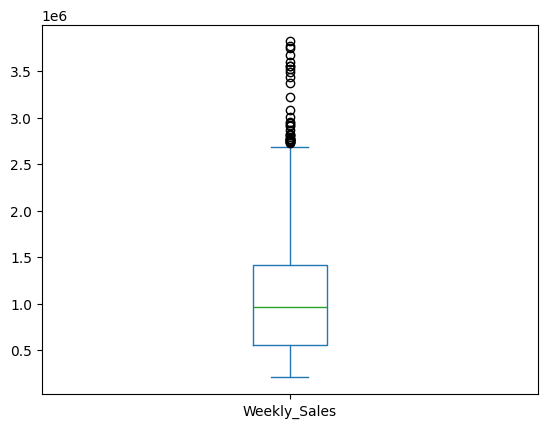

In [219]:
walmart['Weekly_Sales'].plot(kind='box')

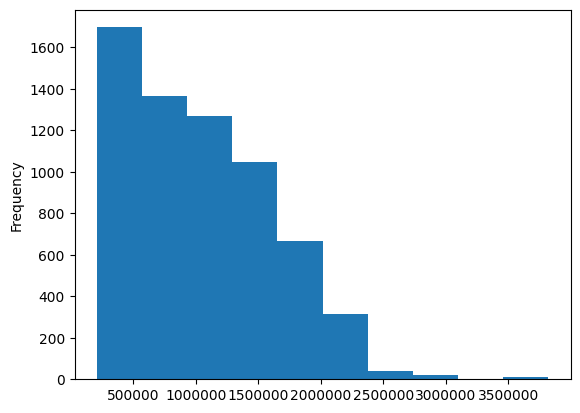

In [220]:
ax = walmart['Weekly_Sales'].plot(kind='hist')
ax.ticklabel_format(style='plain', axis='x')

In [221]:
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'month', 'year', 'day'],
      dtype='object')

<Axes: ylabel='count'>

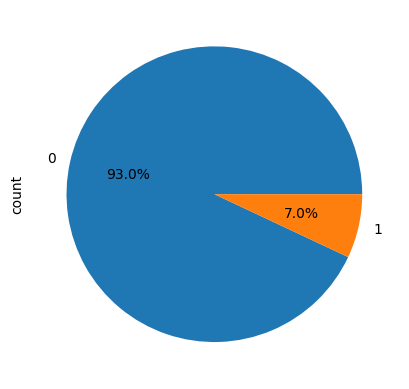

In [222]:
walmart['Holiday_Flag'].value_counts().plot(kind ='pie',autopct = '%0.1f%%')

In [223]:
walmart['Temperature'].describe()

count   6435.00
mean      60.66
std       18.44
min       -2.06
25%       47.46
50%       62.67
75%       74.94
max      100.14
Name: Temperature, dtype: float64

In [224]:
walmart['Temperature'] = (walmart1['Temperature'] - 32) * 5/9 


In [225]:
walmart['Temperature'].describe()

count   6435.00
mean      15.92
std       10.25
min      -18.92
25%        8.59
50%       17.04
75%       23.86
max       37.86
Name: Temperature, dtype: float64

In [226]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,February,2010,Friday
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,February,2010,Friday
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,February,2010,Friday
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,February,2010,Friday
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,March,2010,Friday


<Axes: title={'center': 'Temperature Frequency'}, ylabel='Frequency'>

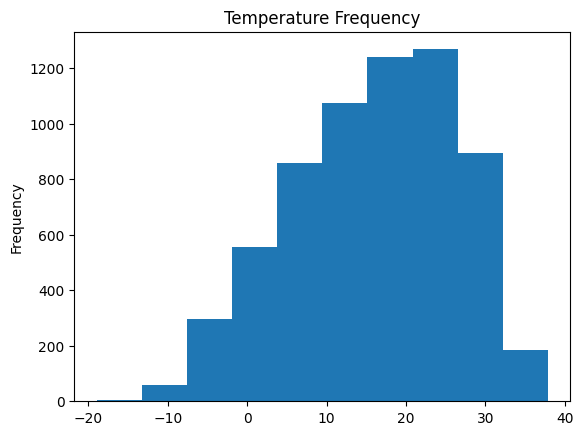

In [255]:
walmart['Temperature'].plot(kind = 'hist',title="Temperature Frequency")

In [228]:
walmart['Fuel_Price'].describe()

count   6435.00
mean       3.36
std        0.46
min        2.47
25%        2.93
50%        3.44
75%        3.73
max        4.47
Name: Fuel_Price, dtype: float64

<Axes: title={'center': 'Fuel_Price Frequency'}, ylabel='Frequency'>

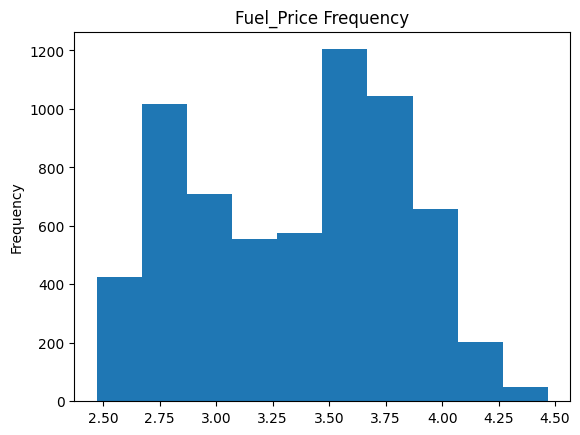

In [256]:
walmart['Fuel_Price'].plot(kind = 'hist',title="Fuel_Price Frequency")

In [229]:
walmart['Fuel_Price'].skew()

np.float64(-0.09615830011865549)

In [230]:
walmart['CPI'].describe()

count   6435.00
mean     171.58
std       39.36
min      126.06
25%      131.74
50%      182.62
75%      212.74
max      227.23
Name: CPI, dtype: float64

In [231]:
walmart['CPI'].skew()

np.float64(0.06349184988549494)

In [232]:
walmart['Unemployment'].describe()

count   6435.00
mean       8.00
std        1.88
min        3.88
25%        6.89
50%        7.87
75%        8.62
max       14.31
Name: Unemployment, dtype: float64

## Bivariate Analysis
We would take Sales and do analysis with it!!

In [233]:
walmart.head( )

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,February,2010,Friday
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,February,2010,Friday
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,February,2010,Friday
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,February,2010,Friday
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,March,2010,Friday


In [259]:
px.scatter(walmart,y='Weekly_Sales',x='Date',color='month')

In [260]:
px.scatter(walmart,y='Weekly_Sales',x='Date',color='Unemployment')

In [261]:
px.scatter(walmart,y='Weekly_Sales',x='Date',color='Fuel_Price')

In [237]:
px.scatter(walmart,y='Weekly_Sales',x='Date',color='Temperature')
#Less the Temperature more sale

In [ ]:
sales = walmart.groupby('Store')['Weekly_Sales'].sum().sort_values().reset_index()

In [267]:
weat = walmart.groupby('Store')['Temperature'].mean().sort_values().reset_index()

In [291]:
fue = walmart.groupby('Store')['Fuel_Price'].mean().sort_values().reset_index()

In [ ]:
def rating(sale):
    if sale < 70000000:
        return "awful"
    elif sale >= 70000000 and sale <= 200000000:
        return "satisfactory"
    else:
        return "good"

In [265]:
walmart['Temperature'].describe()

count   6435.00
mean      15.92
std       10.25
min      -18.92
25%        8.59
50%       17.04
75%       23.86
max       37.86
Name: Temperature, dtype: float64

In [283]:
def temperature(sale):
    if sale <  8.59:
        return "cold"
    elif sale >= 8.59 and sale <= 17.04:
        return "neutral"
    else:
        return "hot"

In [301]:
def fule(sale):
    if sale <  2.93:
        return "cheap"
    elif sale >= 2.93 and sale <= 3.44:
        return "moderate"
    else:
        return "expensive"

In [300]:
walmart['Fuel_Price'].describe()	

count   6435.00
mean       3.36
std        0.46
min        2.47
25%        2.93
50%        3.44
75%        3.73
max        4.47
Name: Fuel_Price, dtype: float64

In [ ]:
sales['performance'] = sales['Weekly_Sales'].apply(rating)

In [284]:
weat['weather'] = weat['Temperature'].apply(temperature)

In [302]:
fue['fuel'] = fue['Fuel_Price'].apply(fule)

In [303]:
fue['fuel'].value_counts()

fuel
moderate     29
expensive    16
Name: count, dtype: int64

In [304]:
fig = px.bar(sales,x='Store',y='Weekly_Sales',color='performance')
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

In [306]:
newdf = fue.merge(sales,on='Store')

In [307]:
fig = px.bar(newdf,x='Store',y='Weekly_Sales',color='fuel')
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

In [271]:
fig = px.bar(weat,x='Store',y='Temperature',color='weather')
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

In [242]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,February,2010,Friday
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,February,2010,Friday
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,February,2010,Friday
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,February,2010,Friday
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,March,2010,Friday


In [243]:
walmart.drop(columns=['day'],inplace=True)

In [244]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,February,2010
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,February,2010
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,February,2010
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,February,2010
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,March,2010


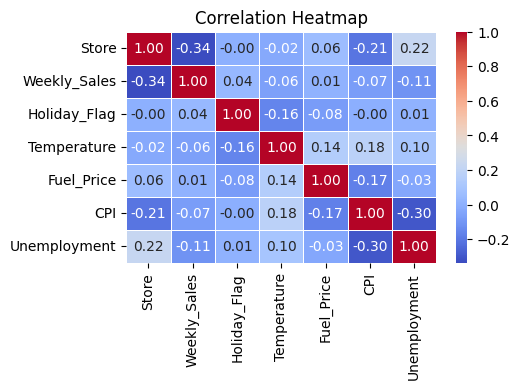

In [245]:
#Heatmap for correlation
plt.figure(figsize=(5, 3))
sns.heatmap(walmart.select_dtypes(include=['int64','float64']).corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [246]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month         6435 non-null   object        
 9   year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 477.7+ KB


In [247]:
sales = walmart.groupby('month')['Weekly_Sales'].sum().reset_index()
px.bar(sales,x='month',y='Weekly_Sales')
#Less the Temperature more sale

In [248]:
sales = walmart.groupby(['year','month'])['Weekly_Sales'].sum().reset_index()
px.line(sales,x='month',y='Weekly_Sales',color='year',)
#Less the Temperature more sale

In [249]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,February,2010
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,February,2010
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,February,2010
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,February,2010
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,March,2010


In [250]:
px.scatter(walmart,y='Weekly_Sales',x='Date',color='CPI')

In [251]:
px.scatter(walmart,y='Temperature',x='Fuel_Price',color='Weekly_Sales')

In [252]:
px.line(walmart,y='Weekly_Sales',x='Date',color='Store')

<Axes: xlabel='Store'>

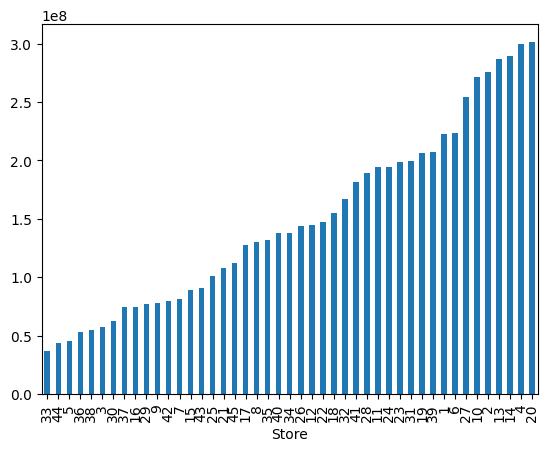

In [253]:
walmart.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind='bar')